In [61]:
# import modules
import os
import csv
import pandas as pd
import numpy as np

# import modules for visualization
import hvplot.pandas
import holoviews as hv
from holoviews import opts

In [62]:
# create an Airbnb dataframe
airbnb_df = pd.read_csv('Resources/air bnb csv with edits.csv')
airbnb_df.head()

,id,name,host_id,host_name,host_since,host_is_superhost,host_identity_verified,instant_bookable,accommodates,amenities,...,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,27-06-2008,f,t,f,6,"[""Elevator"", ""Cable TV"", ""Air conditioning"", ""...",...,2.0,3.0,115,30,730,2,15-05-2016,0.02,1,216
1,2708,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,3008,Chas.,16-09-2008,t,t,t,1,"[""Host greets you"", ""Elevator"", ""Air condition...",...,1.0,1.0,71,30,366,27,6/10/2020,0.35,2,360
2,2732,Zen Life at the Beach,3041,Yoga Priestess,17-09-2008,f,t,f,1,"[""Cooking basics"", ""Host greets you"", ""Smoke a...",...,1.0,1.0,155,1,180,21,27-12-2019,0.18,2,337
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,25-09-2008,f,t,t,2,"[""Host greets you"", ""Air conditioning"", ""Carbo...",...,1.0,1.0,50,30,730,0,NaN,NaN,1,0
4,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,5/3/2009,t,t,f,2,"[""Lock on bedroom door"", ""Fire extinguisher"", ...",...,1.0,1.0,60,30,1125,310,29-04-2020,2.25,5,337


In [63]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_is_superhost',
       'host_identity_verified', 'instant_bookable', 'accommodates',
       'amenities', 'State', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [64]:
# how many hosts are represented in the data
airbnb_df['host_id'].nunique()

86089

In [65]:
# cities that are represented in the data
cities = airbnb_df["neighbourhood_group"].unique()
cities

array(['Los Angeles', 'San Diego County', 'San Francisco', 'San Mateo',
       'Saint Clara County', ' Santa Cruz', 'Chicago', 'Broward County',
       'Hawaii', 'Kauai', 'Maui', 'Honolulu', 'Clark County', 'Manhattan',
       'Brooklyn', 'Queens', 'Staten Island', 'Bronx', 'Nashville',
       'Washington D.C', 'Seattle'], dtype=object)

In [66]:
cities_count = airbnb_df["neighbourhood_group"].nunique()
cities_count

21

In [67]:
# summary statistics for Airbnb prices
airbnb_df["price"].describe()

count    158249.000000
mean        204.370720
std         500.228507
min           0.000000
25%          75.000000
50%         120.000000
75%         200.000000
max       25000.000000
Name: price, dtype: float64

In [68]:
# average prices for each city/county (some are counties, some are cities)
# median chosen because there seemed to be some big outliers
grouped_df = airbnb_df.groupby("neighbourhood_group")['price'].median().round(2).sort_values(ascending=True)
print(grouped_df)

neighbourhood_group
Bronx                  65.0
Queens                 70.0
Staten Island          76.5
Brooklyn               90.0
Chicago                97.0
Saint Clara County     99.0
Washington D.C        105.0
Seattle               106.0
Los Angeles           110.0
San Mateo             120.0
Broward County        121.0
Manhattan             124.0
Clark County          129.0
San Francisco         133.0
San Diego County      140.0
Honolulu              141.0
Nashville             150.0
Hawaii                150.0
 Santa Cruz           225.0
Maui                  226.0
Kauai                 236.0
Name: price, dtype: float64


In [69]:
import re
import json
from collections import Counter

# Load the CSV file with a relative path
file_path = 'Resources/air bnb csv with edits.csv'  # Relative path to the CSV file
df = pd.read_csv(file_path)

# Function to clean and parse the amenities column
def clean_and_parse_amenities(amenities_str):
    try:
        cleaned_str = re.sub(r'(\w+):', r'"\1":', amenities_str).replace("'", '"')
        return json.loads(cleaned_str)
    except (json.JSONDecodeError, ValueError):
        return []

# Apply the parsing function and flatten the list of amenities
all_amenities = [item for sublist in df['amenities'].apply(lambda x: clean_and_parse_amenities(x) if isinstance(x, str) else []) for item in sublist]

# Count the frequency of each unique amenity
amenities_counter = Counter(all_amenities)

# Get the 10 most common amenities
most_common_amenities = amenities_counter.most_common(10)

# Print the most popular amenities
print("The most popular amenities are:")
for amenity, count in most_common_amenities:
    print(f"{amenity}: {count} listings")


The most popular amenities are:
Wifi: 153989 listings
Essentials: 146827 listings
Smoke alarm: 144300 listings
Kitchen: 139559 listings
Hangers: 132614 listings
TV: 130571 listings
Heating: 126875 listings
Hair dryer: 124915 listings
Iron: 120742 listings
Air conditioning: 120480 listings


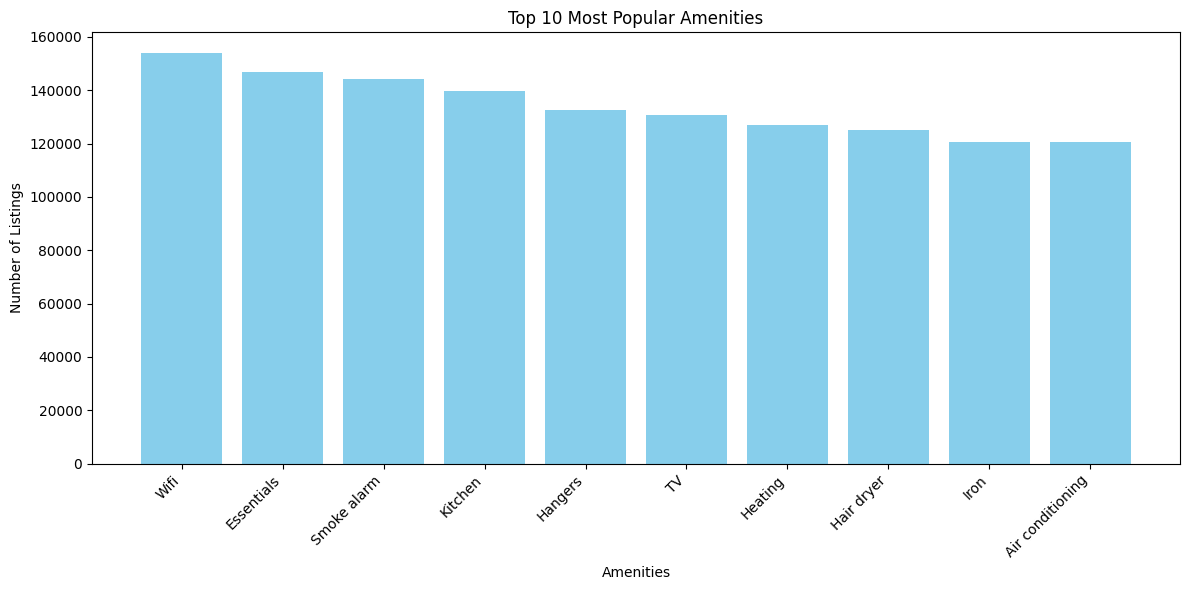

In [70]:
import matplotlib.pyplot as plt

# Extract amenities and their counts for visualization
amenities = [amenity for amenity, count in most_common_amenities]
counts = [count for amenity, count in most_common_amenities]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(amenities, counts, color='skyblue')
plt.title('Top 10 Most Popular Amenities')
plt.xlabel('Amenities')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping

# Display the chart
plt.show()

Top 7 Amenities by Year:
Year 2008:
  1. Wifi - 68 listings
  2. Essentials - 67 listings
  3. Heating - 55 listings

Year 2009:
  1. Wifi - 520 listings
  2. Smoke alarm - 483 listings
  3. Essentials - 476 listings

Year 2010:
  1. Wifi - 1328 listings
  2. Smoke alarm - 1249 listings
  3. Heating - 1236 listings

Year 2011:
  1. Wifi - 3448 listings
  2. Essentials - 3223 listings
  3. Kitchen - 3188 listings

Year 2012:
  1. Wifi - 6383 listings
  2. Essentials - 5970 listings
  3. Kitchen - 5876 listings

Year 2013:
  1. Wifi - 8296 listings
  2. Essentials - 7790 listings
  3. Kitchen - 7697 listings

Year 2014:
  1. Wifi - 11893 listings
  2. Essentials - 11298 listings
  3. Smoke alarm - 11149 listings

Year 2015:
  1. Wifi - 14217 listings
  2. Essentials - 13604 listings
  3. Smoke alarm - 13202 listings

Year 2016:
  1. Wifi - 14928 listings
  2. Essentials - 14448 listings
  3. Smoke alarm - 13909 listings

Year 2017:
  1. Wifi - 11232 listings
  2. Smoke alarm - 10485 list

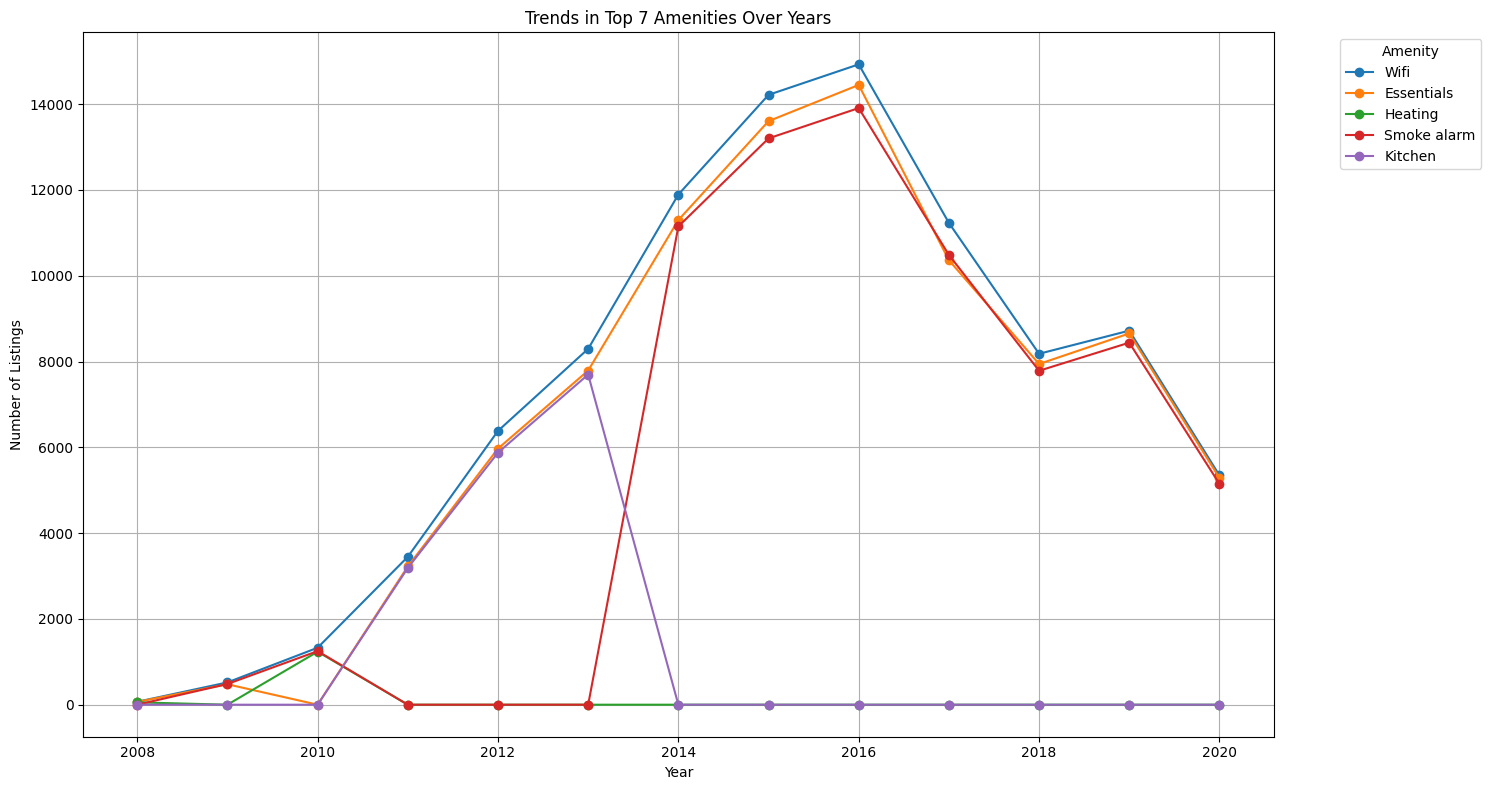

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame that tracks the count of each top 7 amenity by year
amenity_trend_data = {}

# Print the top 7 amenities by year
print("Top 7 Amenities by Year:")
for year, amenities in sorted(top_amenities_per_year.items()):
    print(f"Year {int(year)}:")
    for rank, (amenity, count) in enumerate(amenities[:7], start=1):  # Top 7 amenities
        print(f"  {rank}. {amenity} - {count} listings")
        if amenity not in amenity_trend_data:
            amenity_trend_data[amenity] = {}
        amenity_trend_data[amenity][year] = count
    print()  # Newline for better readability

# Convert to DataFrame
amenity_trend_df = pd.DataFrame(amenity_trend_data).fillna(0)

# Plot trends for the top 7 most common amenities
plt.figure(figsize=(15, 8))
for amenity in amenity_trend_df.columns:
    plt.plot(amenity_trend_df.index, amenity_trend_df[amenity], marker='o', label=amenity)

plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.title('Trends in Top 7 Amenities Over Years')
plt.legend(title='Amenity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

